### Rotten Tomato Editorial Review Sequence Classification using LSTM

In this Model we Use LSTM (Long Short Term Memory) which is a type of RNN (Recurrent Neural Network) to analyse the sentiments of critics consensus of the movie list.

But this is done with a twist. All you have to do is Enter the URL of the editorial post you want to Analyse and the code will scrape the data from the website for you and it will input it to the model to build an LSTM sequence classifier.

We use BeautifulSoup for web scraping and Keras and TensorFlow for the model building 

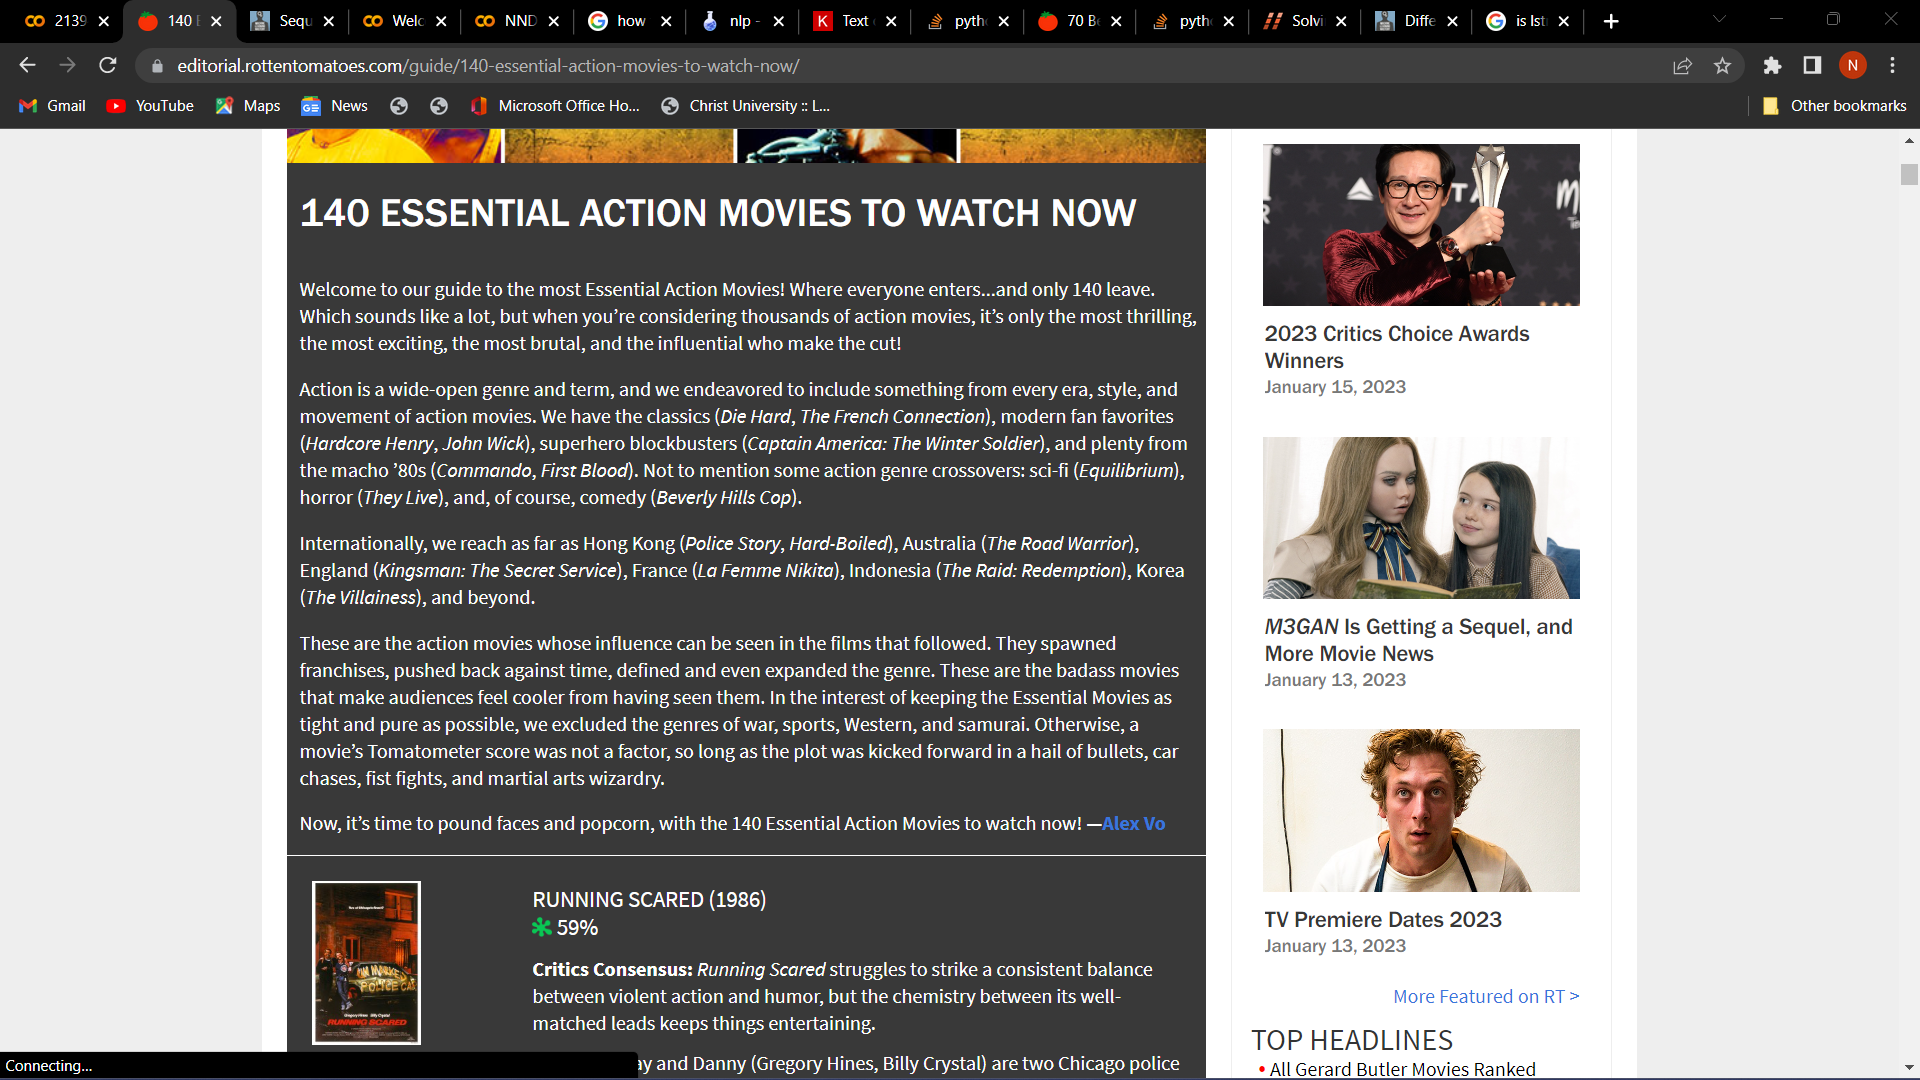

### Scraping Phase

Above we see an example webpage of a Rotten Tomato editorial page. Now let us begin scraping the website.

In [ ]:
#Importing the necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
#Enter the Rotten Tomato webpage URL you want to analyse
URL = input("Enter the URL here:")

Enter the URL here:https://editorial.rottentomatoes.com/guide/140-essential-action-movies-to-watch-now/


In [ ]:
headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'}


r = requests.get(URL,headers=headers)
# Check if the URL is working. If the status is 200, then the URL is active
print(r.status_code)

200


In [ ]:
soup = BeautifulSoup(r.text,'html.parser')
#printing the title text to verify the URL selected
print(soup.title.text)

  140 Essential Action Movies To Watch Now << Rotten Tomatoes – Movie and TV News


Initiating the scraping function

In [ ]:
# This code block will scrape the two classes we need to build the model. One being the review and the other being the score.
m=[]
l=[]
n=[]
o=[]
import requests
from bs4 import BeautifulSoup as bs
  
  
req = requests.get(URL)
soup = BeautifulSoup(req.content, 'html.parser') # Parsing content using beautifulsoup
review=soup.findAll('div',attrs={'class': 'info critics-consensus'})
for review in review:
    m=review.text
    print(m)
    l.append(m)

score=soup.findAll('span',attrs={'class': 'tMeterScore'})
for score in score:
    n=score.text
    print(n)
    o.append(n)

Critics Consensus: Running Scared struggles to strike a consistent balance between violent action and humor, but the chemistry between its well-matched leads keeps things entertaining.
Critics Consensus: Equilibrium is a reheated mishmash of other sci-fi movies.
Critics Consensus: With death-defying action sequences and epic historic sweep, Hero offers everything a martial arts fan could ask for.
Critics Consensus: Whether Road House is simply bad or so bad it's good depends largely on the audience's fondness for Swayze -- and tolerance for violently cheesy action.
Critics Consensus: As fast, loud, and relentless as the train at the center of the story, Unstoppable is perfect popcorn entertainment -- and director Tony Scott's best movie in years.
Critics Consensus: This is the man that would risk his neck for his brother, man. Can you dig it?
Critics Consensus: The Villainess offers enough pure kinetic thrills to satisfy genre enthusiasts -- and carve out a bloody niche for itself in m

In [ ]:
#Appending the two lists into a dataframe
df = pd.DataFrame(
    {'Review': l,
     'Rating': o})
df.head()

,Review,Rating
0,Critics Consensus: Running Scared struggles to...,59%
1,Critics Consensus: Equilibrium is a reheated m...,40%
2,Critics Consensus: With death-defying action s...,94%
3,Critics Consensus: Whether Road House is simpl...,40%
4,"Critics Consensus: As fast, loud, and relentle...",87%


### Cleaning and Preprocessing Phase 

Here we are cleaning the dataframe for analysis and we are marking anything above 80% as a positive review and below it as a negative review

In [ ]:
df['Review']=df['Review'].str.replace('Critics Consensus:','')
df['Rating']=df['Rating'].str.replace('%','').astype(float)
df['Rating']= np.where(df['Rating']>80,'positive','negative') 
df.head()

,Review,Rating
0,Running Scared struggles to strike a consiste...,negative
1,Equilibrium is a reheated mishmash of other s...,negative
2,With death-defying action sequences and epic ...,positive
3,Whether Road House is simply bad or so bad it...,negative
4,"As fast, loud, and relentless as the train at...",positive


In [ ]:
#Importing libraries
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#Replacing labels with 0 and 1 for classification

df['Rating'] = df['Rating'].map({'positive': 1, 'negative': 0})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Here we are preprocessing the text running it through an NLP text cleaning pipline to ensure that clean data goes into the model

In [ ]:
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()


#Defining clean_text function
def clean_text(text):
    text = re.sub(r'[^A-Za-z0-9]+',' ',text)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

#Creating new column for processed reviews
df['Review'] = df['Review'].apply(lambda x: clean_text(x))

In [ ]:
df.head(30)

,Review,Rating
0,run scar struggle strike consistent balance v...,0
1,equilibrium reheat mishmash sci fi movie,0
2,death defy action sequence epic historic swee...,1
3,whether road house simply bad bad good depend...,0
4,fast loud relentless train center story unsto...,1
5,man would risk neck brother man dig,1
6,villainess offer enough pure kinetic thrill s...,1
7,people hate highlander cheesy bombastic absur...,0
8,lack fresh thrill predecessor die hard 2 stil...,0
9,national treasure treasure fun ride forgive h...,0


Converting the text into tokens and the vectorising the same to build the model as the model cannot take text as input data.

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(df["Review"])
sequences = tokenizer.texts_to_sequences(df["Review"])
print(sequences)

[[174, 361, 362, 175, 176, 363, 9, 1, 23, 101, 45, 62, 177, 178, 364, 6], [365, 366, 367, 14, 15, 3], [179, 180, 1, 27, 63, 368, 181, 102, 46, 64, 65, 66, 47, 182, 369], [370, 48, 371, 372, 103, 103, 373, 374, 183, 104, 375, 376, 377, 378, 184, 1], [16, 185, 379, 380, 381, 24, 186, 382, 67, 68, 35, 187, 188, 105, 3, 106], [36, 189, 383, 384, 385, 36, 386], [387, 46, 37, 388, 107, 2, 108, 5, 389, 390, 190, 391, 392, 393, 1, 191], [192, 394, 395, 184, 109, 110, 192, 111, 396], [69, 112, 2, 49, 113, 38, 70, 71, 72, 10, 193, 28, 73, 74, 29, 194, 18, 19, 397, 12, 398], [399, 195, 195, 20, 75, 196, 400, 401, 12], [402, 76, 197, 198, 403, 404, 199, 1, 405, 406, 114, 407, 12, 408, 200, 409, 410, 411], [77, 412, 413, 5, 414, 72, 115, 415, 416, 116, 417, 30, 78, 201, 202, 2, 418, 419], [4, 420, 74, 421, 422, 24, 50, 423, 3, 424, 79, 80, 203, 51], [425, 204, 426, 81, 63, 24, 62, 427, 428, 117, 205, 206, 429, 5], [118, 21, 430, 431, 432, 433, 52, 207, 81, 1, 10, 434, 46, 82, 53, 435, 208, 436, 25,

### Model Building Phase

Now we import various modules to build the LSTM model and run it

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
# fix random seed for reproducibility
tf.random.set_seed(7)

In [ ]:
#Defining input and target variable
x = sequences
y = df['Rating']
top_words = 1000
#Training and splitting
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [ ]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=10)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_41 (Embedding)    (None, 500, 32)           32000     
                                                                 
 lstm_39 (LSTM)              (None, 100)               53200     
                                                                 
 dense_39 (Dense)            (None, 1)                 101       
                                                                 
Total params: 85,301
Trainable params: 85,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
12/12 [==============================] - 7s 378ms/step - loss: 0.6932 - accuracy: 0.4732 - val_loss: 0.6835 - val_accuracy: 0.7143
Epoch 2/5
12/12 [==============================] - 4s 323ms/step - loss: 0.6772 - accuracy: 0.5893 - val_loss: 0.6467 - val_accuracy: 0.7143
Epoch 3/5
12/12 [=========

As we can see we have achieved a 75% accuracy on the model. This was using a simple LSTM model. We can stop her but to understand the other LSTM model options let us run a few variations and observe how the accuracy and loss varies.

Now we are runnning the model with some dropout. This is viable for big data to save computing power. Even though our data is small let us run the model with some dropout to see how it varies.

In [ ]:
from tensorflow.keras.layers import Dropout

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.1))
model.add(LSTM(100))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=5, batch_size=10)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_43 (Embedding)    (None, 500, 32)           32000     
                                                                 
 dropout_18 (Dropout)        (None, 500, 32)           0         
                                                                 
 lstm_41 (LSTM)              (None, 100)               53200     
                                                                 
 dropout_19 (Dropout)        (None, 100)               0         
                                                                 
 dense_41 (Dense)            (None, 1)                 101       
                                                                 
Total params: 85,301
Trainable params: 85,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
12/12 [===========================

As we can see there was a dip in the accuracy, now let us run it with recurrent dropout option and observe the same.

In [ ]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=5, batch_size=10)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_45 (Embedding)    (None, 500, 32)           32000     
                                                                 
 lstm_43 (LSTM)              (None, 100)               53200     
                                                                 
 dense_43 (Dense)            (None, 1)                 101       
                                                                 
Total params: 85,301
Trainable params: 85,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
12/12 [==============================] - 14s 809ms/step - loss: 0.6933 - accuracy: 0.5268
Epoch 2/5
12/12 [==============================] - 10s 800ms/step - loss: 0.6743 - accuracy: 0.5893
Epoch 3/5
12/12 [==============================] - 10s 805ms/step - loss: 0.6677 - accuracy: 0.5893
Epoch 4/

We obtain a similar result as the previous.

Now let us run a Bidirectional LSTM to see how the model performs.
A bidirectional LSTM network is simply two separate LSTM networks; one feeds with a forward sequence and another with reversed sequence. Then the output of the two LSTM networks is concatenated together before being fed to the subsequent layers of the network.

In [ ]:
from tensorflow.keras.layers import Bidirectional


# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Bidirectional(LSTM(100, dropout=0.1, recurrent_dropout=0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=5, batch_size=10)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_46 (Embedding)    (None, 500, 32)           32000     
                                                                 
 bidirectional_6 (Bidirectio  (None, 200)              106400    
 nal)                                                            
                                                                 
 dense_44 (Dense)            (None, 1)                 201       
                                                                 
Total params: 138,601
Trainable params: 138,601
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
12/12 [==============================] - 24s 1s/step - loss: 0.6925 - accuracy: 0.5625
Epoch 2/5
12/12 [==============================] - 17s 1s/step - loss: 0.6717 - accuracy: 0.5893
Epoch 3/5
12/12 [=============================

We can see in the last epoch the accuracy was very high for the bidirectional LSTM model. Since it is running two LSTM's this model will tend to provide better results.

Now let's try the same thing using LSTM and a convolutional neural network.

The spatial structure of input data can be learned with great success by convolutional neural networks.


The word order in movie reviews does have a one-dimensional spatial structure, and the CNN might be able to identify invariant patterns for both positive and negative sentiment. Then, an LSTM layer may learn these learnt spatial features as sequences.

In [ ]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D


# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=5, batch_size=10)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_47 (Embedding)    (None, 500, 32)           32000     
                                                                 
 conv1d_6 (Conv1D)           (None, 500, 32)           3104      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 250, 32)          0         
 1D)                                                             
                                                                 
 lstm_45 (LSTM)              (None, 100)               53200     
                                                                 
 dense_45 (Dense)            (None, 1)                 101       
                                                                 
Total params: 88,405
Trainable params: 88,405
Non-trainable params: 0
_________________________________________________

We can see that we were able to achieve a similar result to our first execution with dropout. This ensures scalability of the model in cases of larger data influx

### Inference

We can take the first model of simple LSTM without dropout as the data in one particular webpage will always be less in number. Hence that model provided us with the best result and is the most viable model in this case. Because more the data the better the LSTM model is able to learn and ensure accurate classification.


With the help of LSTM we were able to perform sequence classification of the movie reviews. BeautifulSoup allows to perform this in a real-time way. Extracting the data directly from the web and performing analysis and model buidling on it all at one go showcases the full fledged top to bottom type of model.

We were able to observe different LSTM options and understand their learning and classification capabilities. Overall the different models give us different options and increases adaptibility of the model in case of deployment.

- Nikhil Thomas A